In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Predictor de precios de teléfonos

Este ejemplo se ha realizado para intentar indicar que precio se esta dispuesto a pagar por un movil con un precio determinado.

In [2]:
# Antecedent/Consequent objects hold universe variables and membership

# functions
ram = ctrl.Antecedent(np.arange(1, 12, .1), 'ram') # ram
storage = ctrl.Antecedent(np.arange(4, 1000, .1), 'storage') # gigas
user_opinion = ctrl.Antecedent(np.arange(0, 10, .1), 'user_opinion')
price = ctrl.Consequent(np.arange(100, 1200, .1), 'price')

# Auto-membership function population is possible with .automf(3, 5, or 7)

ram['poor'] = fuzz.trimf(ram.universe, [1, 1, 3])
ram['average'] = fuzz.trimf(ram.universe, [2, 4, 6])
ram['good'] = fuzz.trimf(ram.universe, [5, 8, 10])
ram['r_good'] = fuzz.trimf(ram.universe, [9, 12, 12])

storage['poor'] = fuzz.trimf(storage.universe, [4, 4, 25])
storage['average'] = fuzz.trimf(storage.universe, [25, 80, 180])
storage['good'] = fuzz.trimf(storage.universe, [150, 350, 500])
storage['r_good'] = fuzz.trimf(storage.universe, [450, 500, 1000])

user_opinion['poor'] = fuzz.trimf(user_opinion.universe, [0, 0, 5])
user_opinion['average'] = fuzz.trimf(user_opinion.universe, [4.5, 6, 7.2])
user_opinion['good'] = fuzz.trimf(user_opinion.universe, [7, 8, 9])
user_opinion['r_good'] = fuzz.trimf(user_opinion.universe, [8.5, 10, 10])

price['low'] = fuzz.trimf(price.universe, [100, 100, 250])
price['low_medium'] = fuzz.trimf(price.universe, [175, 250, 400])
price['medium_high'] = fuzz.trimf(price.universe, [350, 400, 700])
price['high'] = fuzz.trimf(price.universe, [650, 800, 1000])
price['very_high'] = fuzz.trimf(price.universe, [950, 1200, 1200])

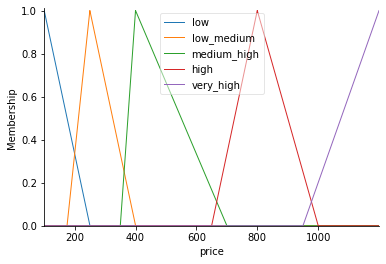

In [3]:
price.view()

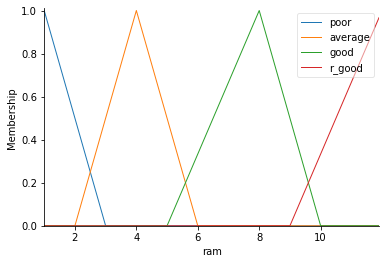

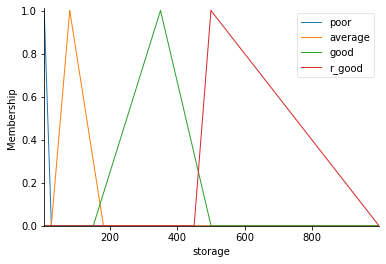

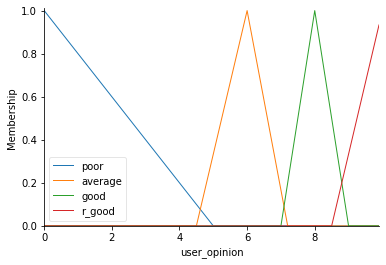

In [4]:
ram.view()
storage.view()
user_opinion.view()

In [5]:
# Si no se quiere ver las figuras comentar la última línea
def getPrice(ram, storage, user_opinion, plot=False):

    system.input['ram'] = ram
    system.input['storage'] = storage
    system.input['user_opinion'] = user_opinion
    
    system.compute()
    
    print("User opinion:",user_opinion,"\tRam:",ram," \tStorage:",storage,"\tPrecio esperado:", round(system.output['price'],2))
    
    if (plot):
        price.view(sim=system)

In [6]:
rules = [
    ctrl.Rule(user_opinion["poor"] | ram["poor"] | storage["poor"], price["low"]),
    ctrl.Rule((ram["average"] | storage["average"]) & user_opinion["average"], price["low_medium"]),
    ctrl.Rule((ram["average"] | storage["average"]) & user_opinion["good"], price["low_medium"]),
    ctrl.Rule((ram["average"] | storage["average"]) & user_opinion["r_good"], price["medium_high"]),
    ctrl.Rule((ram["good"] | storage["good"] | 
              ram["r_good"] | storage["r_good"]) & user_opinion["average"], price["medium_high"]),
    ctrl.Rule((ram["good"] | storage["good"]) & user_opinion["r_good"], price["high"]),
    ctrl.Rule((ram["r_good"] | storage["r_good"]) & user_opinion["r_good"], price["very_high"]),
    ctrl.Rule(ram["r_good"] & storage["r_good"] & user_opinion["r_good"], price["very_high"]),
    ctrl.Rule((ram["good"] | storage["good"]) & user_opinion["poor"], price["low_medium"]),
    ctrl.Rule(ram["r_good"] | storage["r_good"] | user_opinion["r_good"], price["very_high"])
]

m_ctrl = ctrl.ControlSystem(rules)
system = ctrl.ControlSystemSimulation(m_ctrl)

ram_val = [2, 4, 6, 8, 10, 12]
storage_val = [64, 256, 1000]
user_val = [4, 6, 9]

for u in user_val:
    for r in ram_val:
        for s in storage_val:
            getPrice(r, s, u)
    print("\n\n")



User opinion: 4 	Ram: 2  	Storage: 64 	Precio esperado: 158.33
User opinion: 4 	Ram: 2  	Storage: 256 	Precio esperado: 211.09
User opinion: 4 	Ram: 2  	Storage: 1000 	Precio esperado: 159.15
User opinion: 4 	Ram: 4  	Storage: 64 	Precio esperado: 167.78
User opinion: 4 	Ram: 4  	Storage: 256 	Precio esperado: 242.63
User opinion: 4 	Ram: 4  	Storage: 1000 	Precio esperado: 169.45
User opinion: 4 	Ram: 6  	Storage: 64 	Precio esperado: 242.63
User opinion: 4 	Ram: 6  	Storage: 256 	Precio esperado: 242.63
User opinion: 4 	Ram: 6  	Storage: 1000 	Precio esperado: 243.36
User opinion: 4 	Ram: 8  	Storage: 64 	Precio esperado: 242.63
User opinion: 4 	Ram: 8  	Storage: 256 	Precio esperado: 242.63
User opinion: 4 	Ram: 8  	Storage: 1000 	Precio esperado: 243.36
User opinion: 4 	Ram: 10  	Storage: 64 	Precio esperado: 834.89
User opinion: 4 	Ram: 10  	Storage: 256 	Precio esperado: 710.33
User opinion: 4 	Ram: 10  	Storage: 1000 	Precio esperado: 834.89
User opinion: 4 	Ram: 12  	Storage: 6

User opinion: 10 	Ram: 12  	Storage: 1000 	Precio esperado: 1116.51


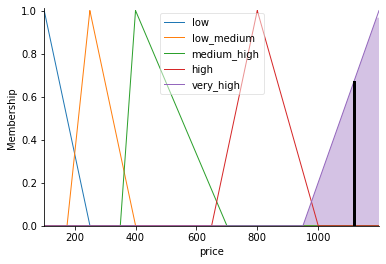

In [7]:
getPrice(12, 1000, 10, plot=True)

User opinion: 5 	Ram: 12  	Storage: 1000 	Precio esperado: 848.94


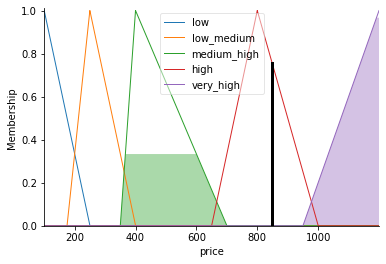

In [8]:
getPrice(12, 1000, 5, plot=True)

User opinion: 10 	Ram: 12  	Storage: 200 	Precio esperado: 1004.92


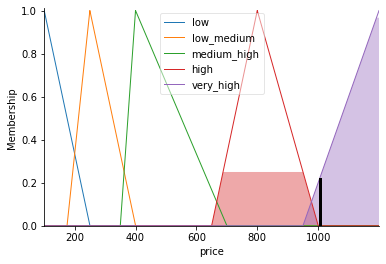

In [9]:
getPrice(12, 200, 10, plot=True)

User opinion: 10 	Ram: 4  	Storage: 200 	Precio esperado: 761.5


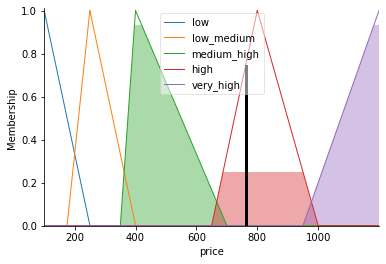

In [10]:
getPrice(4, 200, 10, plot=True)